###  Python Basics Tutorial

####  Binary Classificaiton Machine Learning Case Study

####  Machine Learning Mastery with Python
####  Jason Brownlee

## Prepare Problem

In [2]:
## Load Libraries

import numpy
from matplotlib import pyplot as plt

from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
## Load data
path = 'D:\OneDrive - QJA\My Files\DataScience\DataSets'
filename = 'sonar.txt'

df = read_csv(path + '\\' + filename, header = None)

In [32]:
plt.rcParams['figure.figsize'] = [15, 15]

## 2. Summarize Data 

In [33]:
## df info

print(df.shape); 

set_option('display.max_rows', 10)
print(df.dtypes)

# specifying df.columns instead of 10 will show all var types
# which are found to all be float except last one which is
# class (read as object)

(208, 61)
0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object


In [45]:
## display first values

set_option('display.width', 200) # sets window display
print(df.head(10))

      0      1      2      3      4      5      6      7      8      9   ...     51     52     53     54     55     56     57     58     59  60
0  0.020  0.037  0.043  0.021  0.095  0.099  0.154  0.160  0.311  0.211  ...  0.003  0.006  0.016  0.007  0.017  0.018  0.008  0.009  0.003   R
1  0.045  0.052  0.084  0.069  0.118  0.258  0.216  0.348  0.334  0.287  ...  0.008  0.009  0.005  0.009  0.019  0.014  0.005  0.005  0.004   R
2  0.026  0.058  0.110  0.108  0.097  0.228  0.243  0.377  0.560  0.619  ...  0.023  0.017  0.009  0.018  0.024  0.032  0.016  0.009  0.008   R
3  0.010  0.017  0.062  0.021  0.021  0.037  0.110  0.128  0.060  0.126  ...  0.012  0.004  0.015  0.009  0.007  0.005  0.004  0.004  0.012   R
4  0.076  0.067  0.048  0.039  0.059  0.065  0.121  0.247  0.356  0.446  ...  0.003  0.005  0.011  0.011  0.002  0.007  0.005  0.011  0.009   R
5  0.029  0.045  0.028  0.017  0.038  0.099  0.120  0.183  0.210  0.304  ...  0.004  0.001  0.004  0.001  0.009  0.006  0.003  0.005  0.

In [43]:
## display tail values

set_option('display.width', 100)
print(df.tail(10))

        0      1      2      3      4      5      6      7      8      9   ...     51     52  \
198  0.024  0.032  0.042  0.040  0.079  0.077  0.088  0.114  0.159  0.205  ...  0.010  0.007   
199  0.012  0.074  0.037  0.022  0.008  0.054  0.111  0.107  0.171  0.227  ...  0.014  0.010   
200  0.013  0.039  0.033  0.008  0.072  0.134  0.163  0.190  0.261  0.319  ...  0.015  0.008   
201  0.034  0.026  0.040  0.057  0.053  0.109  0.171  0.168  0.186  0.266  ...  0.012  0.004   
202  0.027  0.038  0.049  0.085  0.113  0.110  0.135  0.234  0.311  0.400  ...  0.009  0.004   
203  0.019  0.035  0.017  0.018  0.039  0.163  0.203  0.169  0.233  0.268  ...  0.012  0.010   
204  0.032  0.010  0.030  0.056  0.076  0.096  0.099  0.102  0.103  0.215  ...  0.006  0.009   
205  0.052  0.044  0.018  0.029  0.035  0.117  0.126  0.118  0.126  0.253  ...  0.016  0.003   
206  0.030  0.035  0.049  0.061  0.017  0.135  0.146  0.112  0.195  0.235  ...  0.009  0.005   
207  0.026  0.036  0.014  0.027  0.021  

### 2b: Summary Statistics

In [46]:
# distribution / central tendency
set_option('display.width', 1000)
set_option('precision', 4)
print(df.describe().T)

    count    mean     std     min     25%     50%     75%     max
0   208.0  0.0292  0.0230  0.0015  0.0134  0.0228  0.0355  0.1371
1   208.0  0.0384  0.0330  0.0006  0.0164  0.0308  0.0479  0.2339
2   208.0  0.0438  0.0384  0.0015  0.0189  0.0343  0.0580  0.3059
3   208.0  0.0539  0.0465  0.0058  0.0244  0.0440  0.0645  0.4264
4   208.0  0.0752  0.0556  0.0067  0.0381  0.0625  0.1003  0.4010
..    ...     ...     ...     ...     ...     ...     ...     ...
55  208.0  0.0082  0.0057  0.0004  0.0044  0.0069  0.0106  0.0394
56  208.0  0.0078  0.0058  0.0003  0.0037  0.0060  0.0104  0.0355
57  208.0  0.0079  0.0065  0.0003  0.0036  0.0058  0.0103  0.0440
58  208.0  0.0079  0.0062  0.0001  0.0037  0.0064  0.0103  0.0364
59  208.0  0.0065  0.0050  0.0006  0.0031  0.0053  0.0085  0.0439

[60 rows x 8 columns]


In [52]:
## class distribution

print(df.groupby(60).size())

## relatively good balanace between mines and rocks

60
M    111
R     97
dtype: int64


In [53]:
## correlation

set_option('display.width', 1000)
set_option('precision', 3)

print(df.corr(method = 'pearson'))

       0      1      2      3      4      5      6      7      8      9   ...     50     51     52     53     54     55     56     57     58     59
0   1.000  0.736  0.572  0.491  0.345  0.239  0.261  0.356  0.353  0.318  ...  0.254  0.355  0.312  0.322  0.312  0.221  0.314  0.368  0.357  0.347
1   0.736  1.000  0.780  0.607  0.420  0.332  0.279  0.335  0.317  0.271  ...  0.321  0.435  0.346  0.384  0.380  0.262  0.280  0.353  0.352  0.359
2   0.572  0.780  1.000  0.782  0.546  0.346  0.190  0.238  0.253  0.220  ...  0.238  0.394  0.333  0.367  0.290  0.288  0.381  0.334  0.425  0.374
3   0.491  0.607  0.782  1.000  0.727  0.353  0.246  0.247  0.247  0.238  ...  0.175  0.375  0.365  0.334  0.285  0.281  0.340  0.345  0.420  0.401
4   0.345  0.420  0.546  0.727  1.000  0.597  0.335  0.204  0.178  0.183  ...  0.116  0.267  0.315  0.205  0.196  0.199  0.219  0.239  0.291  0.254
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...

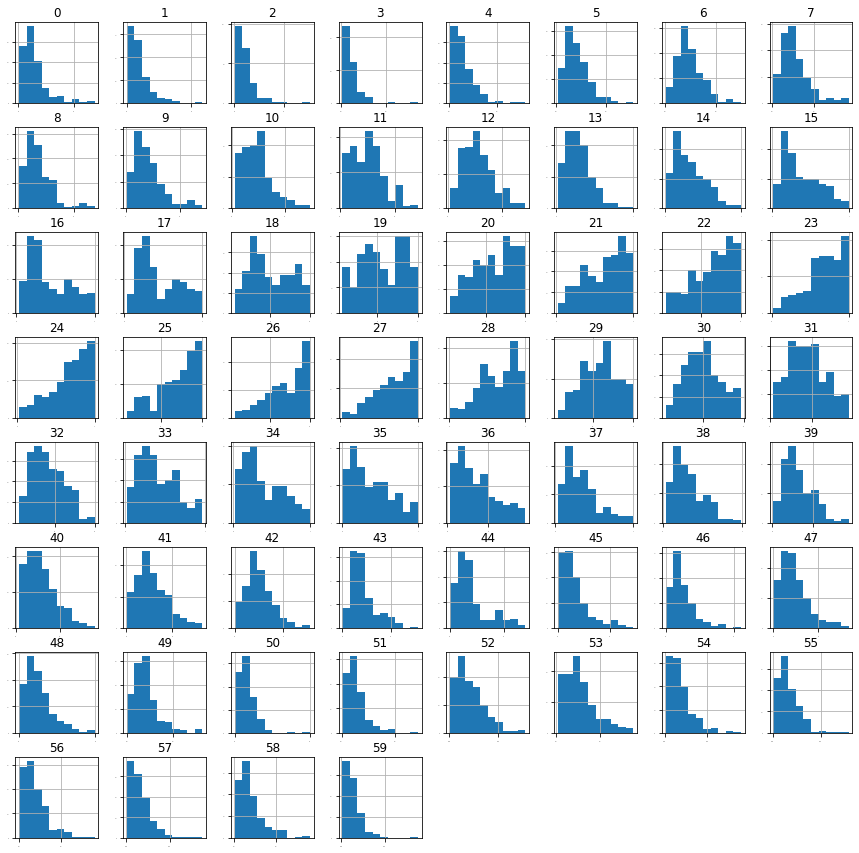

In [56]:
## Unimodal visualization

set_option('display.width', 1000)
# histogram
df.hist(sharex = False,
        sharey = False,
        xlabelsize = 1,
        ylabelsize = 1)

plt.show()

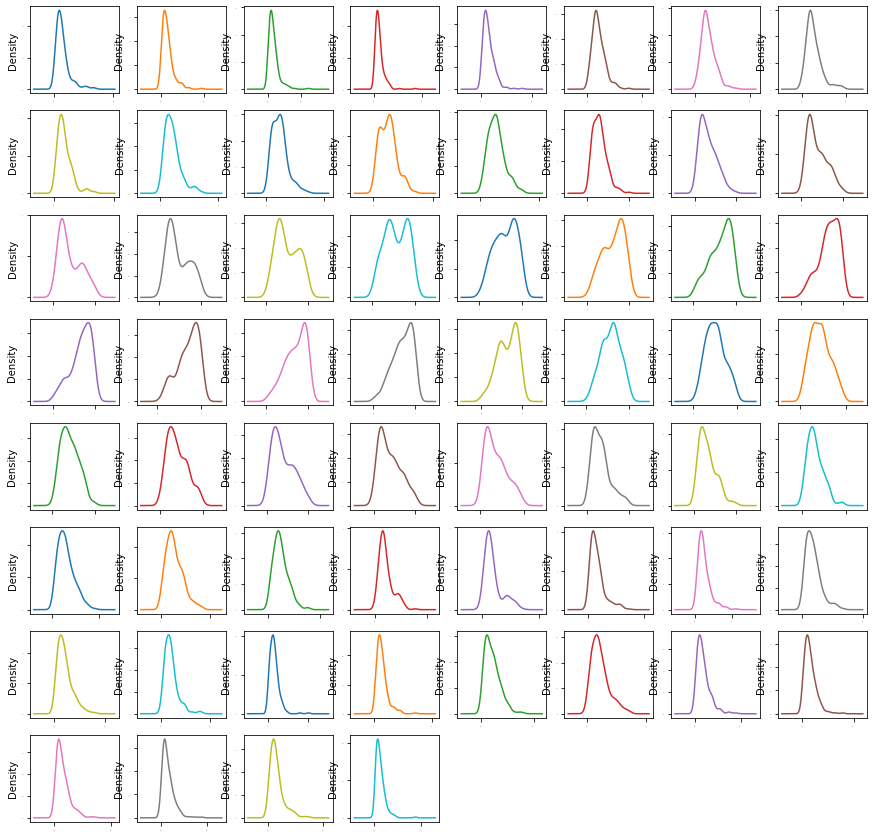

In [58]:
## density plot

set_option('display.width', 1000)
df.plot(kind = 'density', subplots = True, layout = (8,8),
        sharex = False, sharey = False,
        legend = False,
        fontsize = 1)

plt.show()

# histogram above and this density plot suggest consistent skew among 
#   the variables.  Can consider Box-Cox tranform to correct

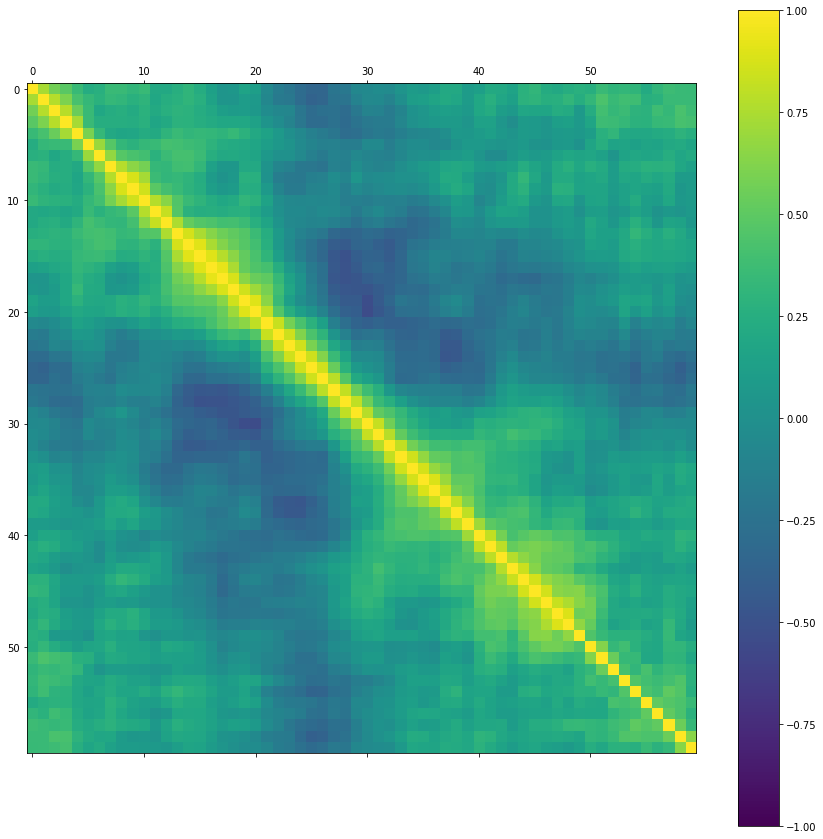

In [59]:
## Multimodal Data Visualization

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)  # need this to add color band below
cax = ax.matshow(df.corr(), 
                 vmin = -1, vmax = 1,
                 interpolation = 'none')
fig.colorbar(cax)
plt.show()

## yellow around diagonal suggest variables near each other
##   are more correlated with each other suggesting there is 
##   structure in order of the dataset variables

## 3: Prepare Data
### 3a: Data Cleaning
### 3b: Feature Selection
### 3c: Data Transformation

## 4: Evaluate Algorithms

### 4a: Split Test Train

In [64]:
array = df.values
X = array[:, 0:60].astype(float)
Y = array[:, 60]

val_size = 0.20
seed = 7
X_tr, X_va, Y_tr, Y_va = train_test_split(X, Y,
                                          test_size = val_size,
                                          random_state = seed)

### 4b: Test Option and Evaluation Metric

In [65]:
num_folds = 10
seed = 7
scoring = 'accuracy'

### 4c: Spotcheck Algorithms

In [66]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))

In [67]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_tr, Y_tr,
                                 cv = kfold,
                                 scoring = scoring)
    results .append(cv_results)
    names.append(name)
    
    # message for baseline algo results
    bl_msg = '%s: %.3f (%.3f)' % (name,
                                  cv_results.mean(),
                                  cv_results.std())
    
    print(bl_msg)
    
## LR and KNN have best 'mean accuracy' scores

LR: 0.783 (0.094)
LDA: 0.746 (0.118)
KNN: 0.808 (0.068)
CART: 0.717 (0.136)
NB: 0.649 (0.142)
SVM: 0.609 (0.119)


### 4d: Compare algorithms

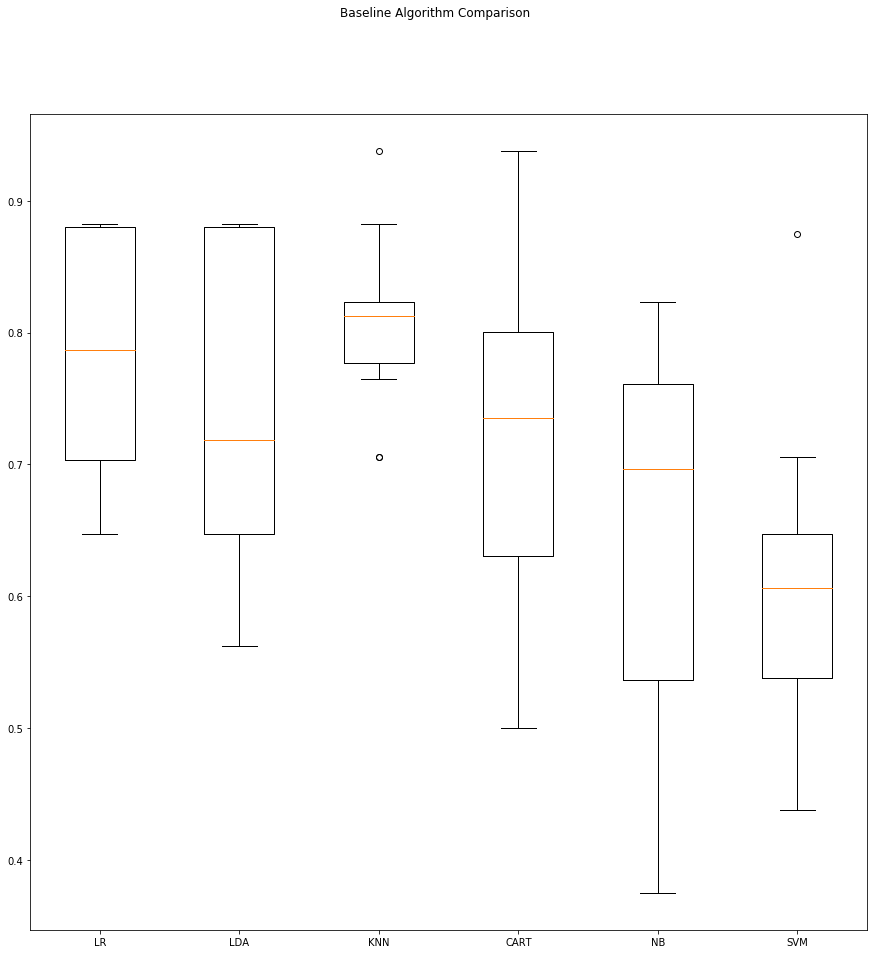

In [68]:
fig = plt.figure()
fig.suptitle('Baseline Algorithm Comparison')

ax = fig.add_subplot(1, 1, 1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## shows KNN has both high mean accuracy and tight distribution
## note that for some models, IQR overlaps indicating these results
## are not statistically signficant from 1 model to the next

### Evaluate Algorithms with Standardized Data

In [72]:
# standardize with pipeline

pipelines = []

pipelines.append(('ScaledLR', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('LR', LogisticRegression(solver = 'liblinear'))])))

pipelines.append(('ScaledLDA', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('LDA', LinearDiscriminantAnalysis())])))

pipelines.append(('ScaledKNN', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('KNN', KNeighborsClassifier())])))

pipelines.append(('ScaledCART', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('CART', DecisionTreeClassifier())])))

pipelines.append(('ScaledNB', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('NB', GaussianNB())])))

pipelines.append(('ScaledSVM', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('SVM', SVC(gamma = 'auto'))])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_tr, Y_tr,
                                 cv = kfold,
                                 scoring = scoring)
    results.append(cv_results)
    names.append(name)
    
    std_msg = '%s: %.3f (%.3f)' % (name,
                                   cv_results.mean(),
                                   cv_results.std())
    
    print(std_msg)

## KNN did slightly better and SVM is much better with standadized data
##   while some others performed worse

ScaledLR: 0.734 (0.096)
ScaledLDA: 0.746 (0.118)
ScaledKNN: 0.826 (0.055)
ScaledCART: 0.700 (0.111)
ScaledNB: 0.649 (0.142)
ScaledSVM: 0.836 (0.089)


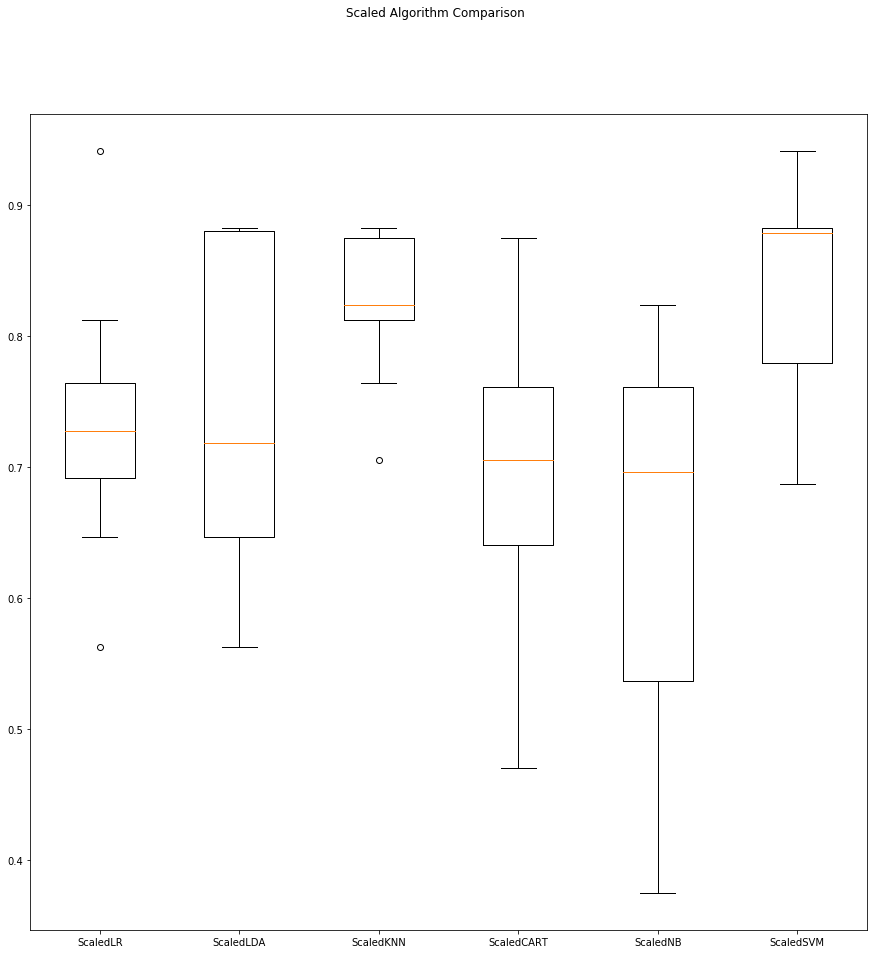

In [74]:
## compare algorithms

fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(1, 1, 1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## shows SVM and KNN are good candidates to further explore

##  5: Improve Accuracy

#### 5a: tuning

In [84]:
## KNN Tuning

## tune neighbors to get best mean accuracy (default was 7)

## scale the x_tr data
scaler = StandardScaler().fit(X_tr)
rescaledX = scaler.transform(X_tr)

neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

param_grid = dict(n_neighbors = neighbors)

model = KNeighborsClassifier()
kfold = KFold(n_splits = num_folds, random_state = seed)

grid = GridSearchCV(estimator = model, 
                    param_grid = param_grid,
                    scoring = scoring, 
                    cv = kfold, 
                    iid = True)

grid_result = grid.fit(rescaledX, Y_tr)

print('Best: %.3f using %s' % (grid_result.best_score_,
                               grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%.3f (%.3f) with: %r' % (mean, stdev, param))
    
## Best: 0.849 using {'n_neighbors': 1} so optimal confg is K=1

Best: 0.849 using {'n_neighbors': 1}
0.849 (0.060) with: {'n_neighbors': 1}
0.837 (0.066) with: {'n_neighbors': 3}
0.837 (0.037) with: {'n_neighbors': 5}
0.765 (0.090) with: {'n_neighbors': 7}
0.753 (0.087) with: {'n_neighbors': 9}
0.735 (0.105) with: {'n_neighbors': 11}
0.735 (0.106) with: {'n_neighbors': 13}
0.729 (0.076) with: {'n_neighbors': 15}
0.711 (0.079) with: {'n_neighbors': 17}
0.723 (0.085) with: {'n_neighbors': 19}
0.711 (0.109) with: {'n_neighbors': 21}


In [88]:
## SVM Tuning

## two params to tune: C (how much to relax margin) and
##  type of kernel (default is radial basis function with
##  C value of 1

## this will test multiple kernels and c values

scaler = StandardScaler().fit(X_tr)
rescaledX = scaler.transform(X_tr)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0,
            1.3, 1.5, 1.7, 2.0]

kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C = c_values, kernel = kernel_values)

model = SVC(gamma = 'auto')
kfold = KFold(n_splits = num_folds, random_state = seed)

grid = GridSearchCV(estimator = model,
                    param_grid = param_grid,
                    scoring = scoring, 
                    cv = kfold, 
                    iid = True)

grid_result = grid.fit(rescaledX, Y_tr)

print('Best: %.3f using %s' % (grid_result.best_score_,
                               grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%.3f (%.3f) with: %r' % (mean, stdev, param))
    

    
## rbf kernel is still the beest but C valu of 1.5 improves
##   performance slightly

Best: 0.867 using {'C': 1.5, 'kernel': 'rbf'}
0.759 (0.099) with: {'C': 0.1, 'kernel': 'linear'}
0.530 (0.119) with: {'C': 0.1, 'kernel': 'poly'}
0.572 (0.130) with: {'C': 0.1, 'kernel': 'rbf'}
0.705 (0.066) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.747 (0.109) with: {'C': 0.3, 'kernel': 'linear'}
0.645 (0.132) with: {'C': 0.3, 'kernel': 'poly'}
0.765 (0.092) with: {'C': 0.3, 'kernel': 'rbf'}
0.735 (0.055) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.741 (0.083) with: {'C': 0.5, 'kernel': 'linear'}
0.681 (0.099) with: {'C': 0.5, 'kernel': 'poly'}
0.789 (0.064) with: {'C': 0.5, 'kernel': 'rbf'}
0.747 (0.059) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.747 (0.085) with: {'C': 0.7, 'kernel': 'linear'}
0.741 (0.128) with: {'C': 0.7, 'kernel': 'poly'}
0.813 (0.085) with: {'C': 0.7, 'kernel': 'rbf'}
0.753 (0.059) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.759 (0.097) with: {'C': 0.9, 'kernel': 'linear'}
0.771 (0.102) with: {'C': 0.9, 'kernel': 'poly'}
0.837 (0.088) with: {'C': 0.9, 'kernel': 'rbf'}
0.753 

#### 5b: Ensemble Methods

In [93]:
# ensembles

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators = 10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators = 10)))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_tr, Y_tr,
                                 cv = kfold,
                                 scoring = scoring)
    results.append(cv_results)
    names.append(name)
    
    ens_msg = '%s: %.3f (%.3f)' % (name,
                                   cv_results.mean(),
                                   cv_results.std())
    
    print(ens_msg)
    
    
## all scored in low 80s, lower than SVM previously tested

AB: 0.820 (0.058)
GBM: 0.835 (0.139)
RF: 0.712 (0.091)
ET: 0.824 (0.101)


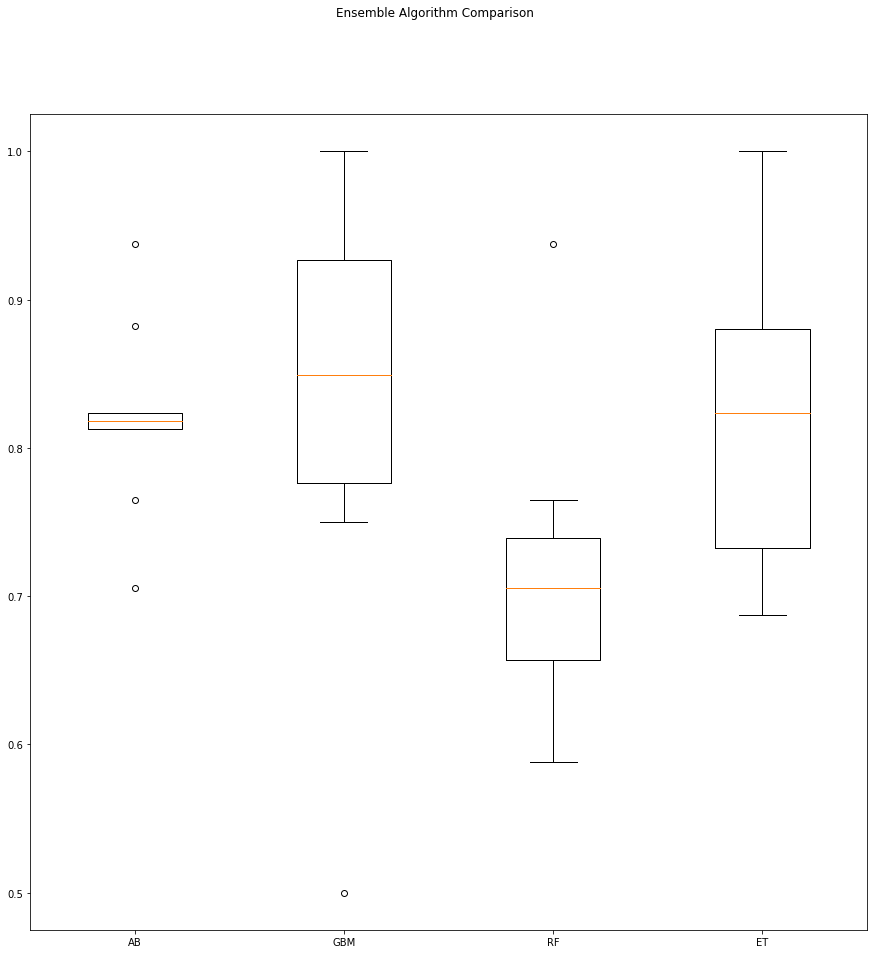

In [94]:
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(1, 1, 1)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## while lower than SVM results above, the GBM model may be worth
##  further study since it has decent mean accuracy score and spread
##  that reaches into high 90s.

## 6: Finalize the Model

In [98]:
## SVM had highest mean so for this tutorial, it is used
##   although, as noted above, GBM has promise that further
##   tuning could produce a better model

scaler = StandardScaler().fit(X_tr)
rescaledX = scaler.transform(X_tr)

model = SVC(C = 1.5)  # rbg kernel was best but its default so no need to specify
model.fit(rescaledX, Y_tr)

## estimate accuracy on val data
rescaledValX = scaler.transform(X_va)

predictions = model.predict(rescaledValX)

print(accuracy_score(Y_va, predictions))
print(confusion_matrix(Y_va, predictions))
print(classification_report(Y_va, predictions))

## prediction accuracy on val set is pretty close to that on
##   test set

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42

